**Task 2: Simple Sales Forecast with Moving Average**
*Implement a basic forecasting method using moving
averages.*

**Train.csv**:

* The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
* store_nbr identifies the store at which the products are sold.
family identifies the type of product sold.
* sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
* onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.

Link of the dataset: https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('/content/train.csv')   #reading the dataset
df['date'] = pd.to_datetime(df['date'])  #Converting date column to datetime format for time-based analysis

In [3]:
daily_sales = df.groupby('date')['sales'].sum().reset_index()

In [4]:
daily_sales['7_day_avg']  = daily_sales['sales'].rolling(window=7).mean()
daily_sales['14_day_avg'] = daily_sales['sales'].rolling(window=14).mean()
daily_sales['30_day_avg'] = daily_sales['sales'].rolling(window=30).mean()
daily_sales['90_day_avg'] = daily_sales['sales'].rolling(window=90).mean()

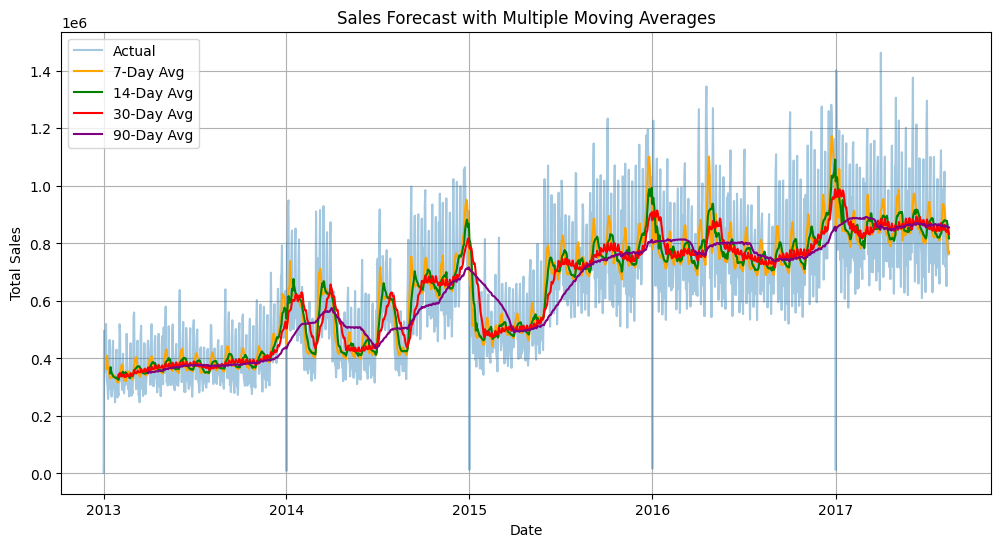

In [5]:
plt.figure(figsize=(12,6))
plt.plot(daily_sales['date'], daily_sales['sales'], label='Actual', alpha=0.4)
plt.plot(daily_sales['date'], daily_sales['7_day_avg'], label='7-Day Avg', color='orange')
plt.plot(daily_sales['date'], daily_sales['14_day_avg'], label='14-Day Avg', color='green')
plt.plot(daily_sales['date'], daily_sales['30_day_avg'], label='30-Day Avg', color='red')
plt.plot(daily_sales['date'], daily_sales['90_day_avg'], label='90-Day Avg', color='purple')
plt.title("Sales Forecast with Multiple Moving Averages")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True)
plt.show()

The graph shows total sales trends over time along with multiple moving averages (7-day, 14-day, 30-day, and 90-day). We can see a clear upward trend in sales from 2013 to 2017, with noticeable seasonal spikes occurring at regular intervals. The longer moving averages (30-day and 90-day) effectively smooth out short-term fluctuations, revealing consistent long-term growth.

In [6]:
last_date = daily_sales['date'].max()
forecast_next_day = daily_sales['30_day_avg'].iloc[-1]
print(f"🔹 Forecasted total sales for next day after {last_date.date()}: {forecast_next_day:.2f}")

🔹 Forecasted total sales for next day after 2017-08-15: 832844.23


In [7]:
daily_sales['forecast_7day'] = daily_sales['7_day_avg'].shift(1)

In [8]:
valid = daily_sales.dropna(subset=['forecast_7day'])

In [9]:
mae = mean_absolute_error(valid['sales'], valid['forecast_7day'])
rmse = np.sqrt(mean_squared_error(valid['sales'], valid['forecast_7day']))

print(f"\n🔹 Forecast Accuracy Metrics (using 7-day moving avg):")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


🔹 Forecast Accuracy Metrics (using 7-day moving avg):
Mean Absolute Error (MAE): 113793.63
Root Mean Squared Error (RMSE): 147557.72


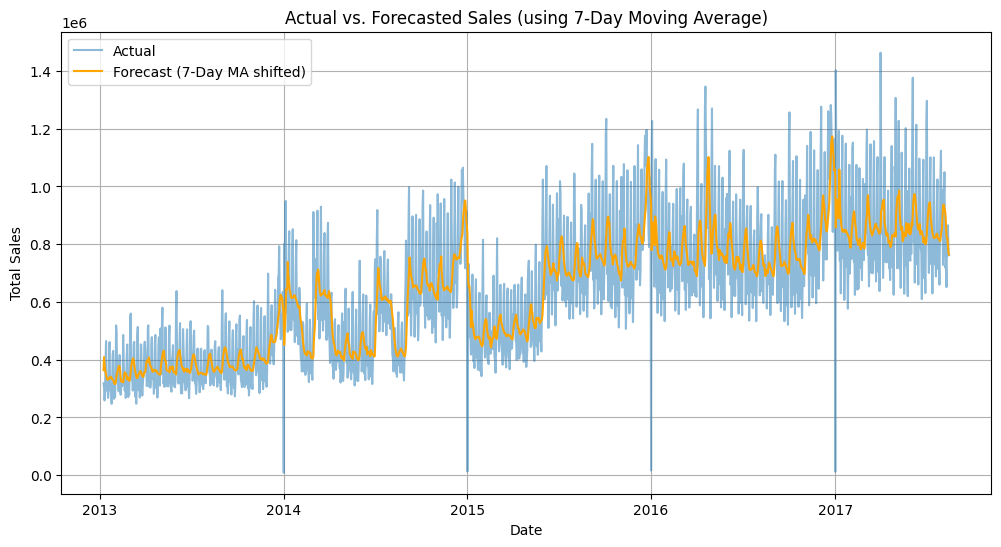

In [10]:
plt.figure(figsize=(12,6))
plt.plot(valid['date'], valid['sales'], label='Actual', alpha=0.5)
plt.plot(valid['date'], valid['forecast_7day'], label='Forecast (7-Day MA shifted)', color='orange')
plt.title("Actual vs. Forecasted Sales (using 7-Day Moving Average)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True)
plt.show()


The plot compares actual sales with forecasted sales using a 7-day moving average. The forecast line closely follows the actual sales trend, capturing overall patterns and seasonality. However, it smooths out short-term fluctuations, indicating that while moving averages are useful for trend prediction, they may not fully capture sudden spikes in sales.

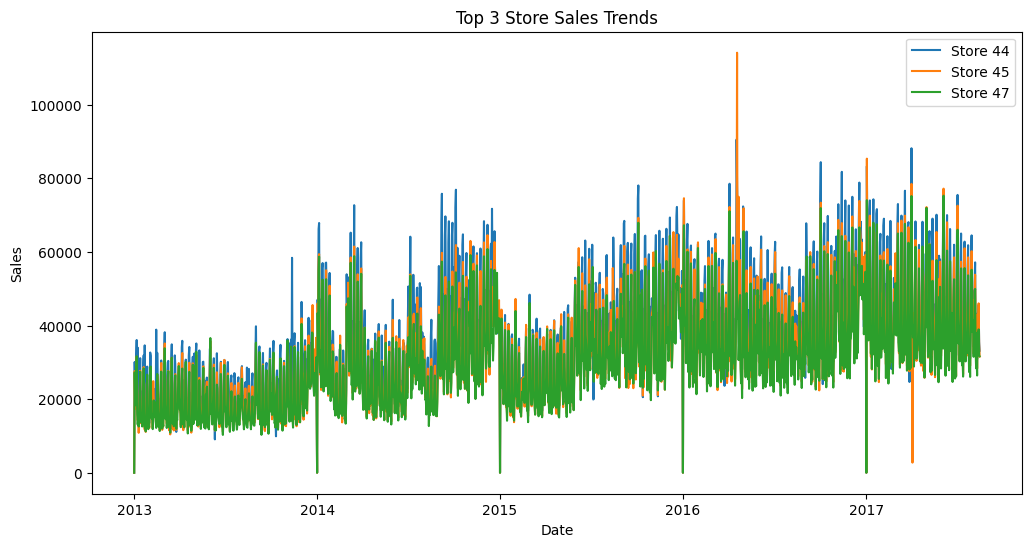

In [11]:
store_trend = df.groupby(['date','store_nbr'])['sales'].sum().reset_index()
store_avg = store_trend.groupby('store_nbr')['sales'].mean().reset_index().sort_values(by='sales', ascending=False)

top3_stores = store_avg['store_nbr'].head(3).tolist()
plt.figure(figsize=(12,6))
for s in top3_stores:
    subset = store_trend[store_trend['store_nbr'] == s]
    plt.plot(subset['date'], subset['sales'], label=f'Store {s}')
plt.title("Top 3 Store Sales Trends")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

This 'Top 3 Store Sales Trends,' shows that sales for all three stores (44, 45, and 47) generally increased over the period from 2013 to 2017, with significant seasonal fluctuations and Store 44 consistently exhibiting the highest peaks. All stores also show a marked drop in sales at regular intervals.